In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.cm as cm
%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/MOCK/indian_liver_patient_dataset.csv')

## 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age        583 non-null int64
gender     583 non-null object
TB         583 non-null float64
DB         583 non-null float64
alkphos    583 non-null int64
sgpt       583 non-null int64
sgot       583 non-null int64
TP         583 non-null float64
ALB        583 non-null float64
A_G        583 non-null float64
class      583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [46]:
df.var()

age          262.110702
gender         0.184559
TB            38.558160
DB             7.887659
alkphos    59018.866587
sgpt       33350.194438
sgot       83473.916429
TP             1.178205
ALB            0.632850
A_G            0.101437
class          0.204747
dtype: float64

In [5]:
df.isna().sum()

age        0
gender     0
TB         0
DB         0
alkphos    0
sgpt       0
sgot       0
TP         0
ALB        0
A_G        0
class      0
dtype: int64

In [6]:
df.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.shape

(583, 11)

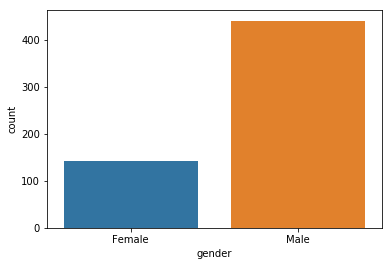

In [8]:
sns.countplot(x=df['gender'],data=df)
# from this we can infer that males make up 85% of the patients who may/may not be affected with liver disease

In [9]:
df.corr()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,0.026948,-0.137351
TB,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,0.032129,-0.220208
DB,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,0.034385,-0.246046
alkphos,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,0.039139,-0.184866
sgpt,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.027201,-0.163416
sgot,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,0.020991,-0.151934
TP,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,-0.016607,0.035008
ALB,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,-0.050497,0.161388
A_G,0.026948,0.032129,0.034385,0.039139,0.027201,0.020991,-0.016607,-0.050497,1.000000,-0.039254
class,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,-0.039254,1.000000


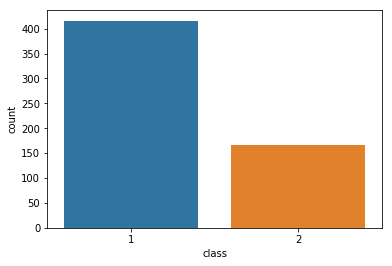

In [10]:
sns.countplot(df['class'],data=df)

In [11]:
# from this we can infer that out of 583 patients, 416 are affected

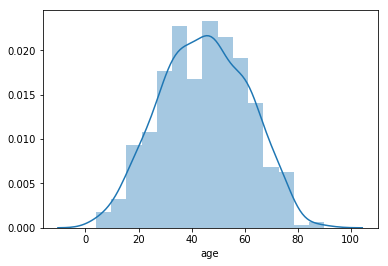

In [12]:
sns.distplot(df['age'])

In [13]:
# from this we can infer that most of the patients are between age 40 and age 46

In [14]:
df[df == -100000] =np.nan

In [15]:
df.isnull().sum()

age        0
gender     0
TB         0
DB         0
alkphos    0
sgpt       0
sgot       0
TP         0
ALB        0
A_G        4
class      0
dtype: int64

In [16]:
m = df['A_G'].mean()
m
df.fillna(m,inplace=True)

In [17]:
df.groupby(df['class']).median()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G
class,,,,,,,,,
1,46.0,1.4,0.5,229.0,41.0,52.5,6.55,3.0,0.9
2,40.0,0.8,0.2,186.0,27.0,29.0,6.60,3.4,1.0


In [18]:
# from ALB we can infer that class 2 patients are healthy as they have albumin level at 3.4 
# which is in the normal albumin range.

# from A_G we can infer that class 2 patients are healthy as they have albumin_globulin ratio 
# equivalent to 1.0 which is normal range

# from these columns we can infer that class 2 is healthy, class 1 is affected from liver disease

In [26]:
#skewness
from scipy.stats import skew
for i in df.columns:
    if i == 'gender' or i == 'class':
        continue
    else:
        print(i+':'+str(skew(df[i].values)))
        print()

age:-0.0293096531748283

TB:4.8948385248878825

DB:3.2041317604378037

alkphos:3.755412227842381

sgpt:6.532329464026143

sgot:10.519023554210735

TP:-0.28493665487447245

ALB:-0.043572251735588034

A_G:0.9931397332044614



In [22]:
# from the above values we can infer that age, gender, TP, ALB are left-skewed.
# the remaining are right skewed.

In [27]:
#kurtosis
from scipy.stats import kurtosis
for i in df.columns:
    if i == 'gender' or i == 'class':
        continue
    else:
        x=df[i].values
        print(i+':'+str(kurtosis(x,fisher=False,bias=True)))
        print()

age:2.4344521734071916

TB:39.835553083789776

DB:14.245125285091882

alkphos:20.590665553363547

sgpt:53.13643006330851

sgot:152.6183754365633

TP:3.2207707908991527

ALB:2.6051400404698715

A_G:6.286413821583268



In [28]:
# from the above data we can infer that TB, DB, alkphos, sgpt, sgot, TP, A_G have peaks.
# the rest do not.

## 2

In [29]:
from scipy.stats import shapiro
for i in df.columns:
    if i =='gender' or i == 'class':
        continue
    else:
        print(i+':'+str(shapiro(df[i])[1]))

age:0.0036761967930942774
TB:1.5773978206485132e-38
DB:1.1563177719145935e-36
alkphos:5.21741847477215e-35
sgpt:1.402699762789142e-41
sgot:1.4839750737199813e-42
TP:0.003712408011779189
ALB:0.006247302517294884
A_G:1.0301770558569096e-13


age


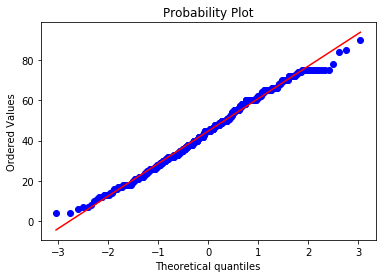

TB


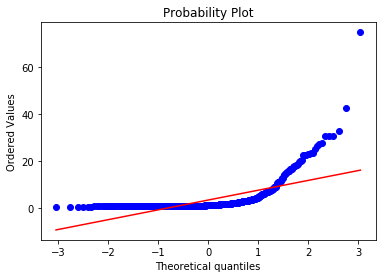

DB


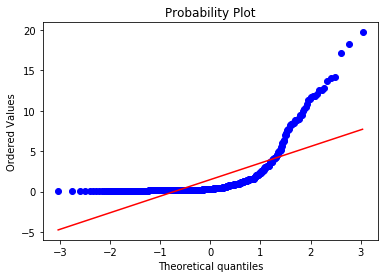

alkphos


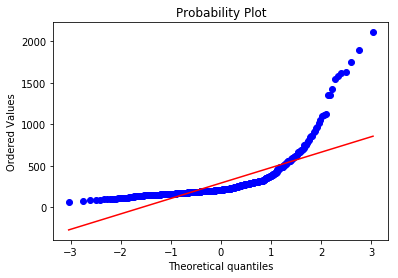

sgpt


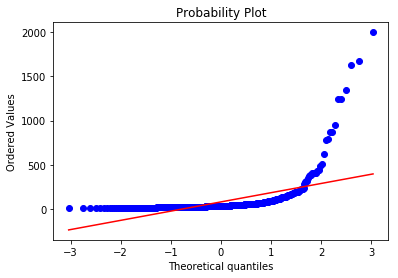

sgot


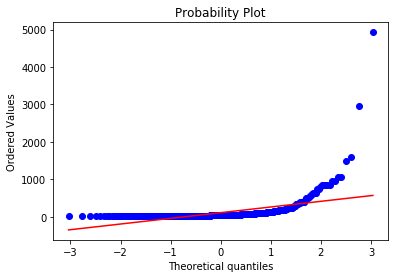

TP


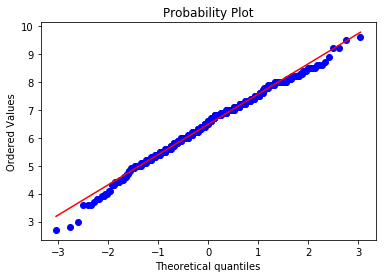

ALB


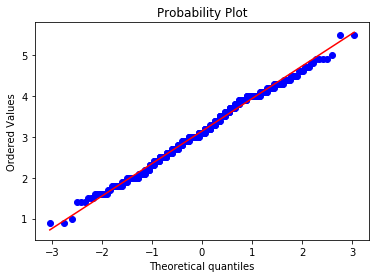

A_G


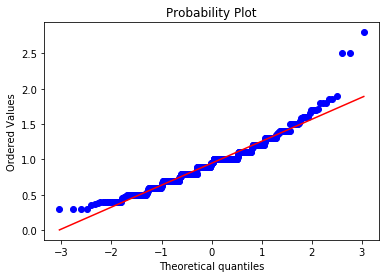

In [32]:
from scipy import stats
for i in df.columns:
    if i == 'gender' or i == 'class':
        continue
    else:
        print(i)
        stats.probplot(df[i],dist='norm',plot=plt)
        plt.show()

In [31]:
# we can infer that some? of the columns are normally distributed

## 3

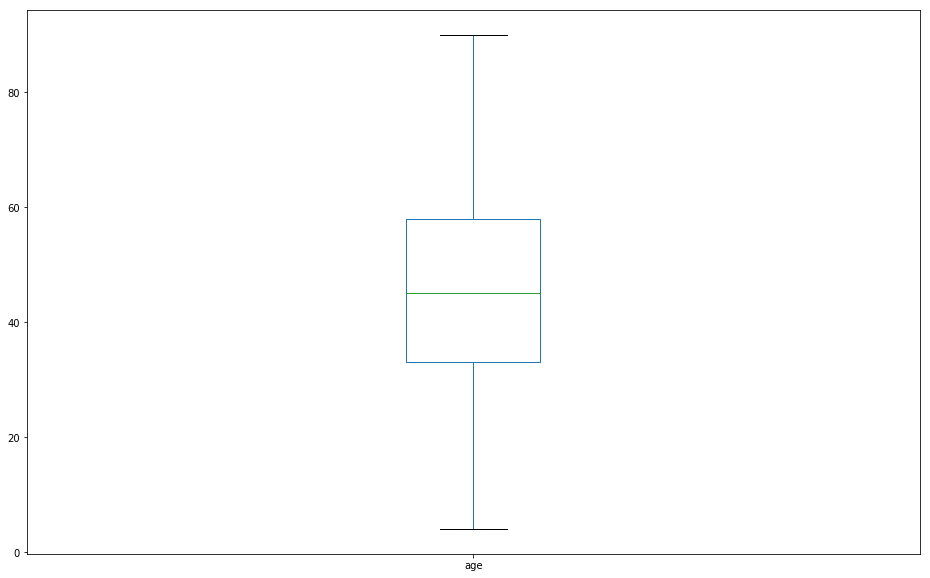

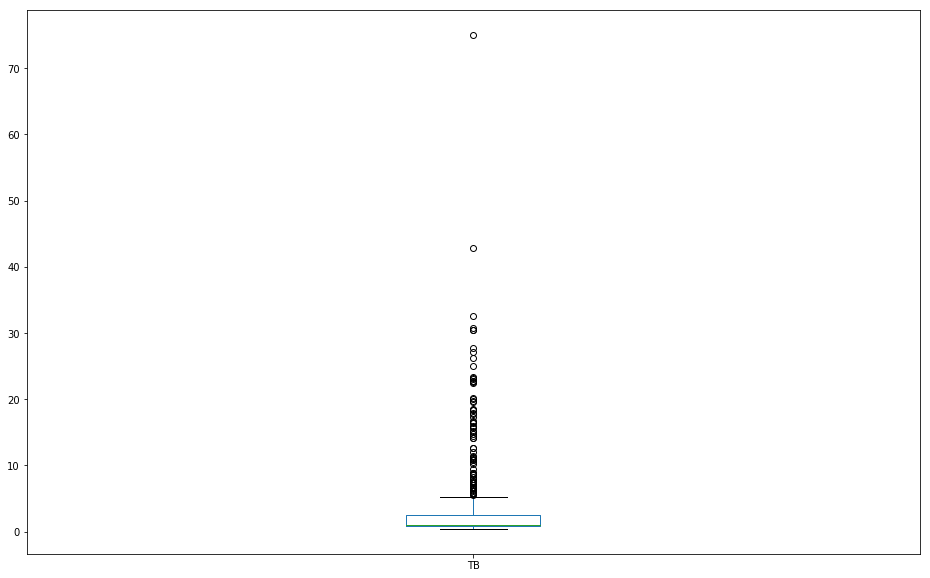

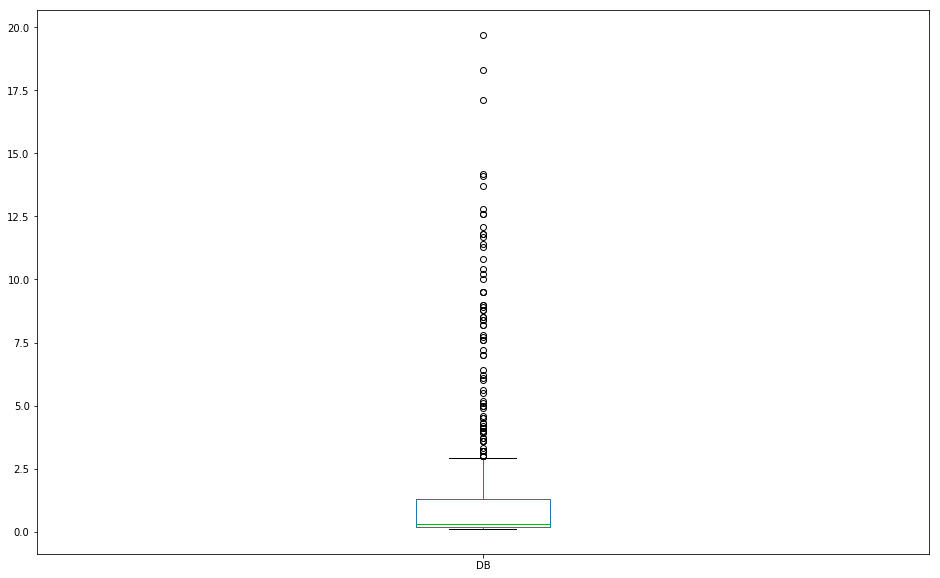

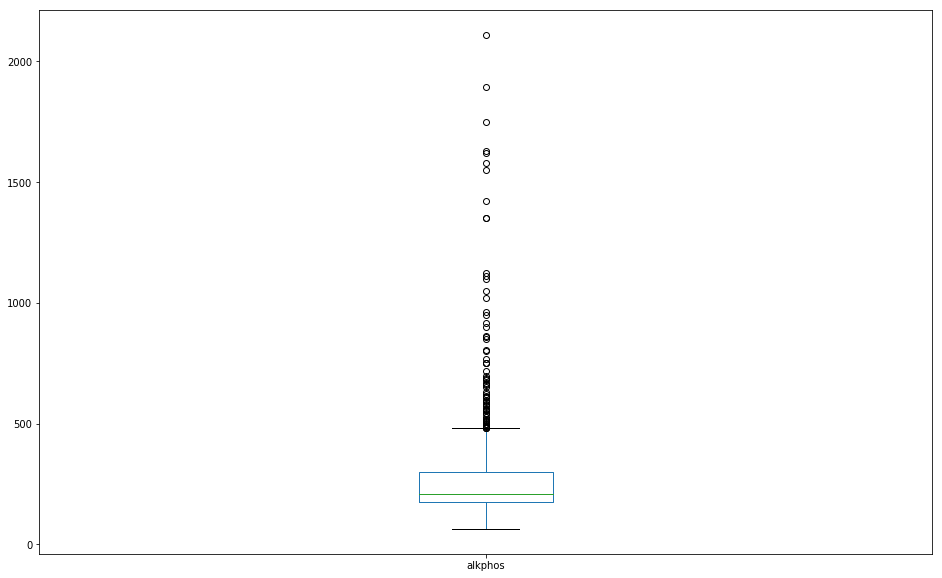

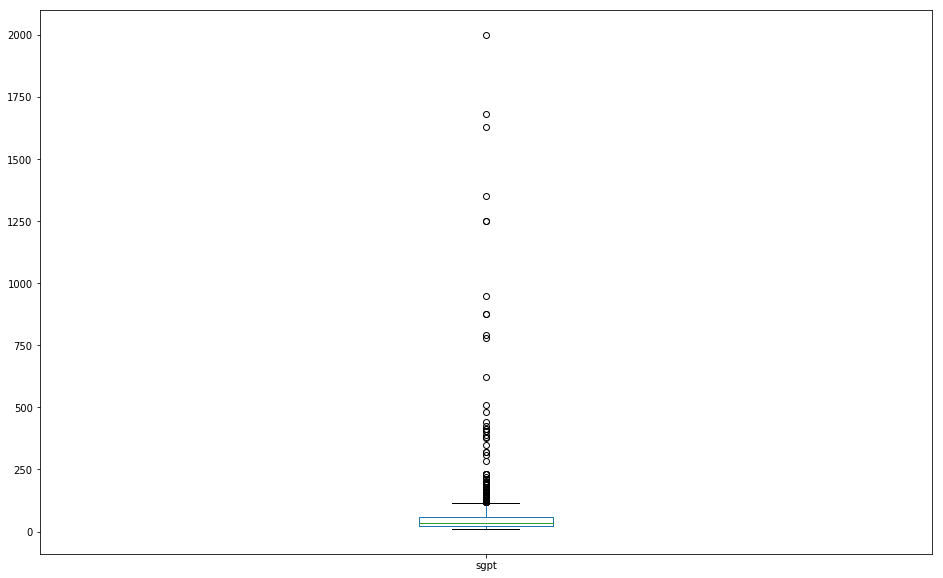

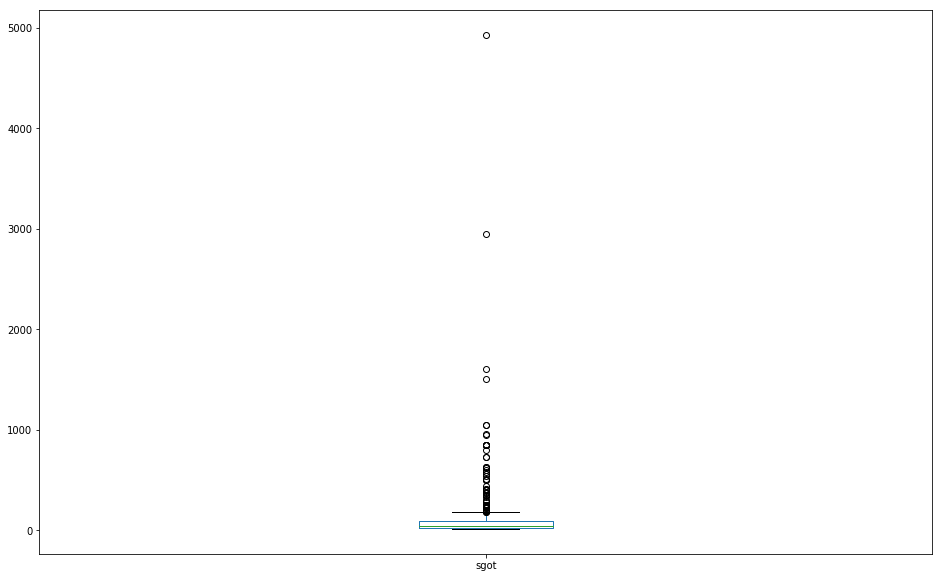

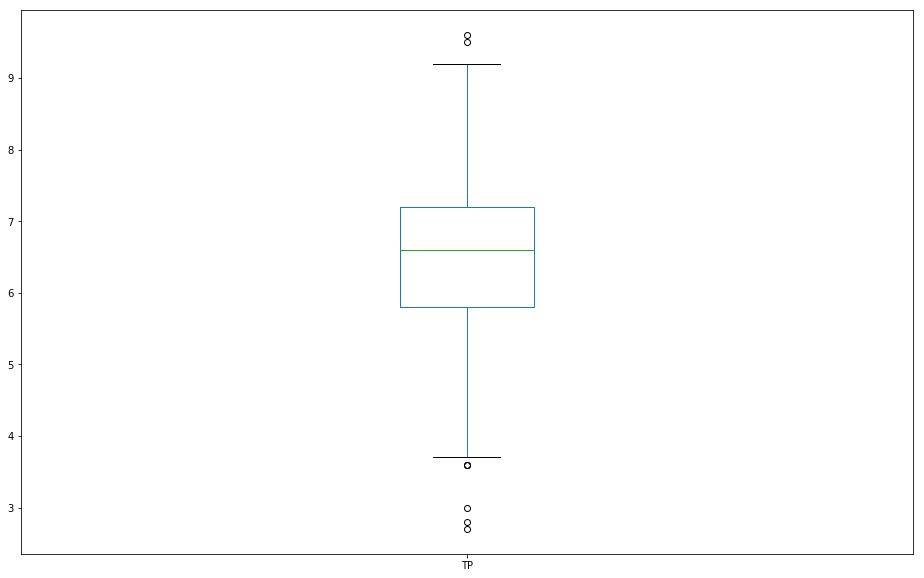

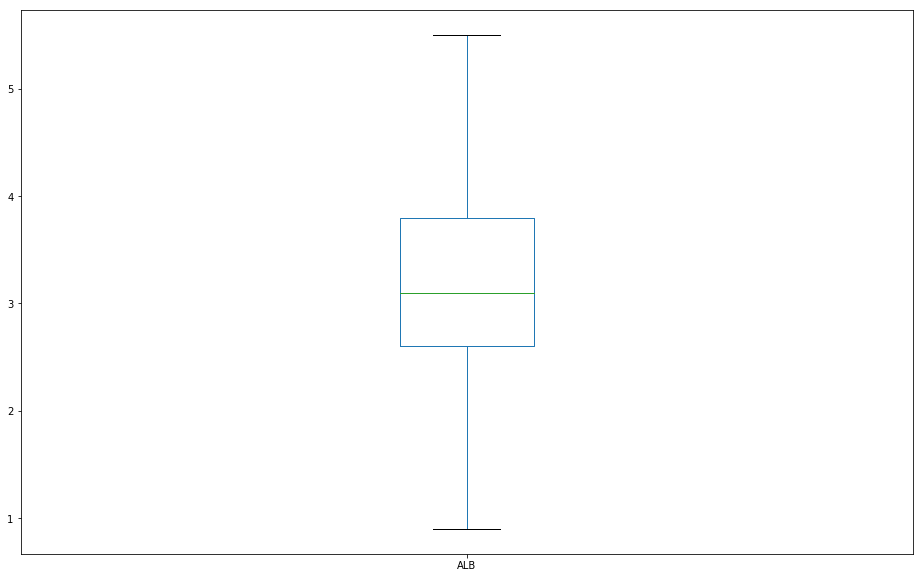

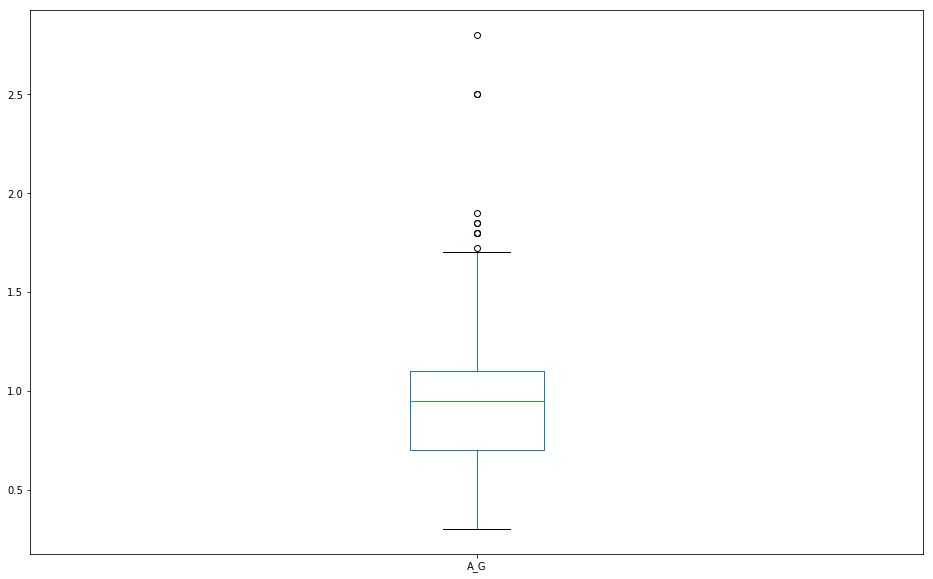

In [33]:
for i in df.columns:
    if i =='gender' or i == 'class':
        continue
    else:
        df[i].plot.box(figsize=(16,10))
        plt.show()

In [ ]:
# Thus we have identified that outliers are present in these columns

## 4

In [34]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [35]:
df["gender"]=le.fit_transform(df["gender"])

In [36]:
df['gender'].head(5)

0    0
1    1
2    1
3    1
4    1
Name: gender, dtype: int32

In [37]:
# Thus we have preprocessed the categorical variables in the dataset

## 5

In [38]:
class1 = df.loc[df['class'] == 1]
class2 = df.loc[df['class'] == 2]

sample1 = class1.sample(frac=0.5)
sample2 = class2.sample(frac=0.5)

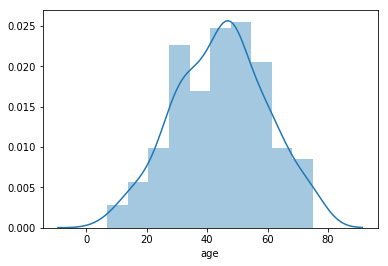

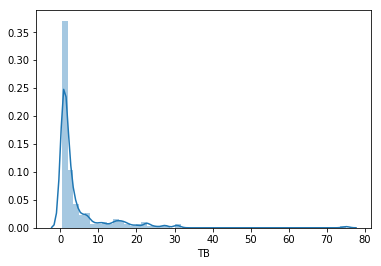

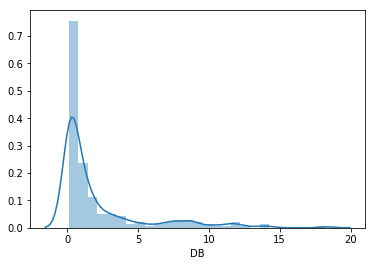

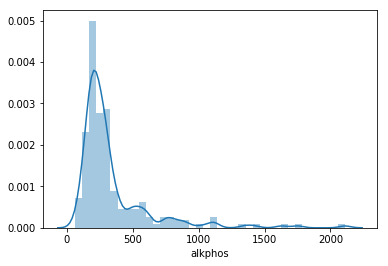

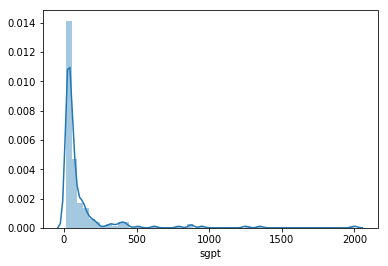

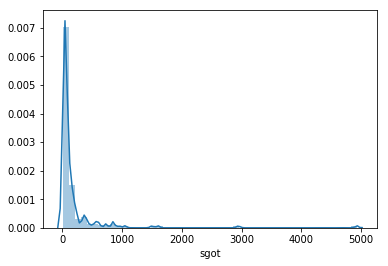

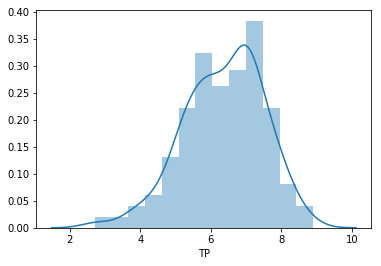

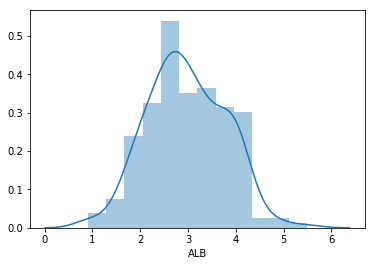

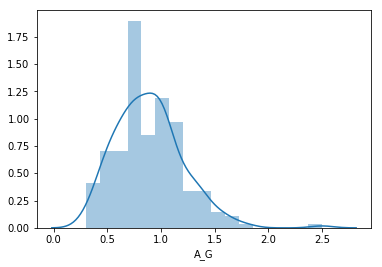

In [39]:
for i in sample1.columns:
    if i == 'gender' or i=='class':
        continue
    else:
        sns.distplot(sample1[i],kde=True)
        plt.show()

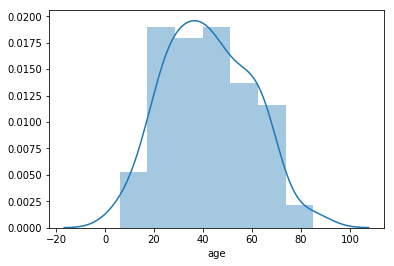

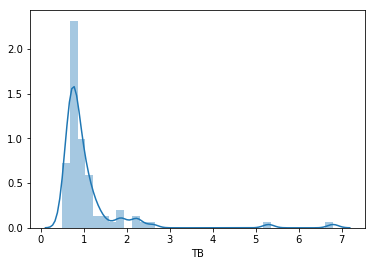

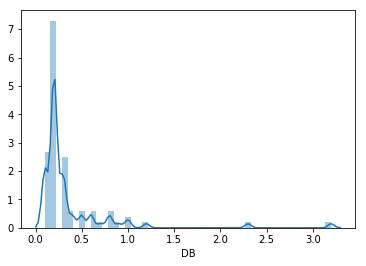

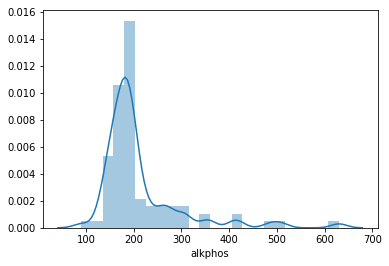

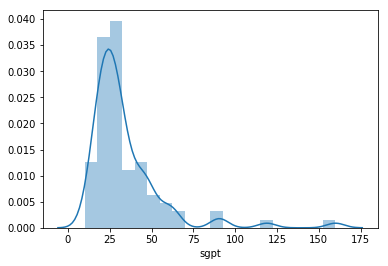

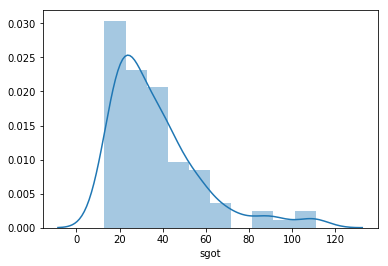

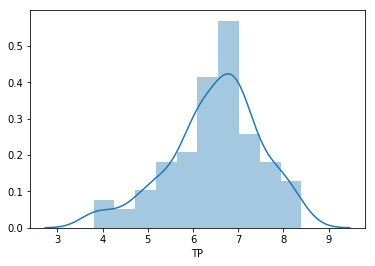

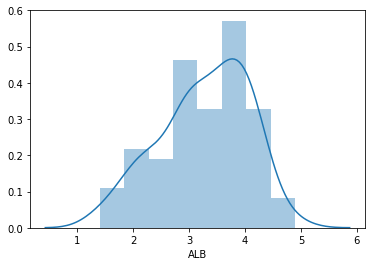

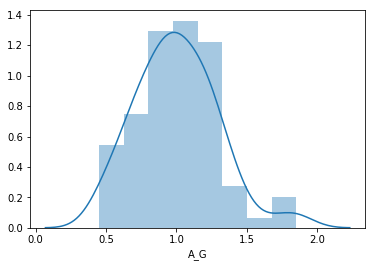

In [40]:
for i in sample2.columns:
    if i == 'gender' or i=='class':
        continue
    else:
        sns.distplot(sample2[i])
        plt.show()

In [41]:
from scipy.stats import binom
x = binom.pmf(5,5,0.5)

In [42]:
x

0.03125

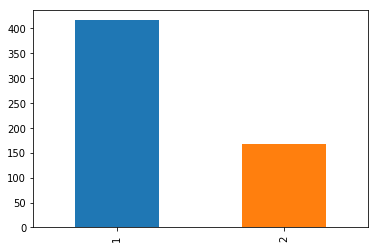

In [48]:
df['class'].value_counts().plot.bar()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.cm as cm
%matplotlib inline


for i in cols:
    if df[i].dtype != np.int64:
        str_df[i] = df[i]


for i in int_df.columns:
    int_df[i].replace(' ?',int_df[i].median(),inplace=True)
	
for i in str_df.columns:
    print(str_df.mode()[i][0])
    str_df[i].replace(to_replace='?',value = str_df.mode()[i][0],inplace=True)


z_score = np.abs(stats.zscore(int_df))
z_score


int_df = int_df[(z_score<2).all(axis=1)]


merged_df = int_df.merge(str_df,how='left', on = 'index')


LINEAR REGRESSION

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 
               'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.fit_transform(X_test[feature])
		
		
		
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)





# Validating our model

import statsmodels.api as sm
X = sm.add_constant(comp_df[["Units"]])
y = comp_df["Minutes"]
model = sm.OLS(y,X).fit()




comp_model.score(X = np.array(comp_df['Units']).reshape(-1,1), y = comp_df['Minutes'])